# <center> Topic 2. Visual data analysis
## <center>Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here").**

**<a href="https://www.kaggle.com/c/titanic">Competition</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
sns.set()
import matplotlib.pyplot as plt

**Read data**

In [2]:
train_df = pd.read_csv("titanic_train.csv", index_col="PassengerId")

In [3]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
train_df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Let's drop`Cabin`, and then – all rows with missing values.**

In [6]:
train_df = train_df.drop("Cabin", axis=1).dropna()

In [7]:
train_df.shape

(712, 10)

**1. Build a picture to visualize all scatter plots for each pair of features `Age`, `Fare`, `SibSp`, `Parch` and `Survived`. ( `scatter_matrix ` from Pandas or `pairplot` from Seaborn)**

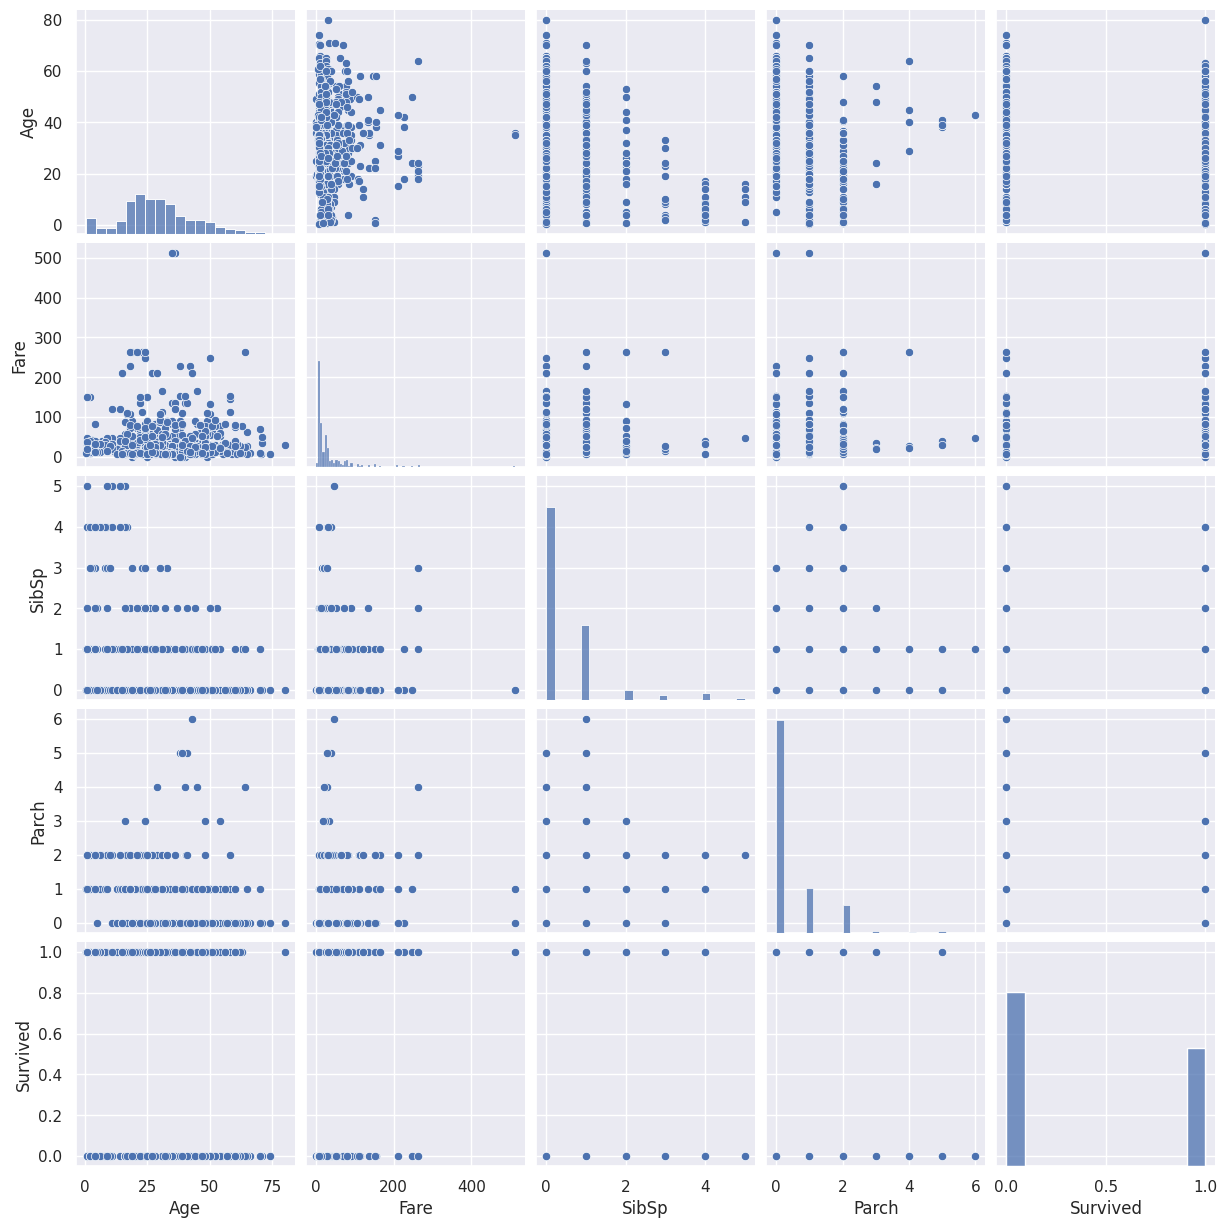

In [20]:
features = ["Age", "Fare", "SibSp", "Parch", "Survived"]
sns.pairplot(train_df[features])

**2. How does ticket price (`Fare`) depend on `Pclass`? Build a boxplot.**

,Pclass,None
0,1,"Axes(0.125,0.11;0.775x0.77)"
1,2,"Axes(0.125,0.11;0.775x0.77)"
2,3,"Axes(0.125,0.11;0.775x0.77)"


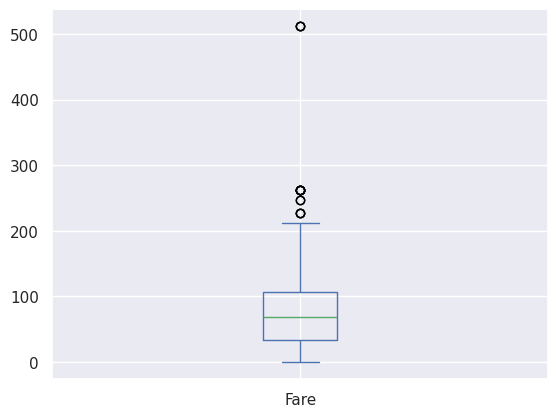

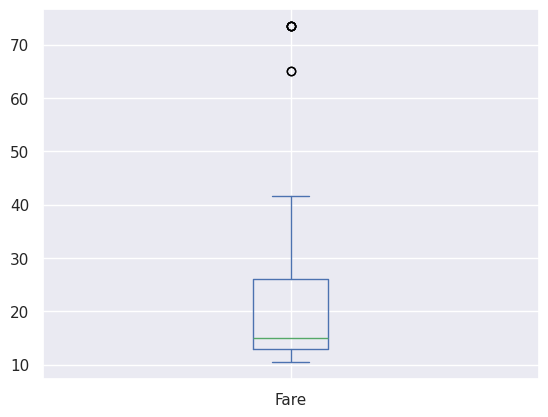

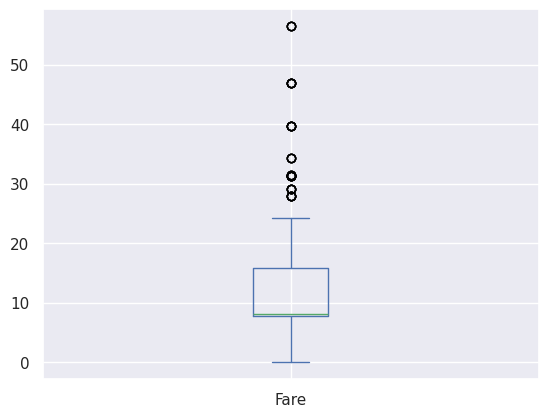

In [38]:
train_df.groupby(["Pclass"], as_index = False).plot(kind="box",x = "Pclass", y = "Fare", subplots = False, legend = True)

**3. Let's build the same plot but restricting values of `Fare` to be less than 95% quantile of the initial vector (to drop outliers that make the plot less clear).**

,Pclass,None
0,1,"Axes(0.125,0.11;0.775x0.77)"
1,2,"Axes(0.125,0.11;0.775x0.77)"
2,3,"Axes(0.125,0.11;0.775x0.77)"


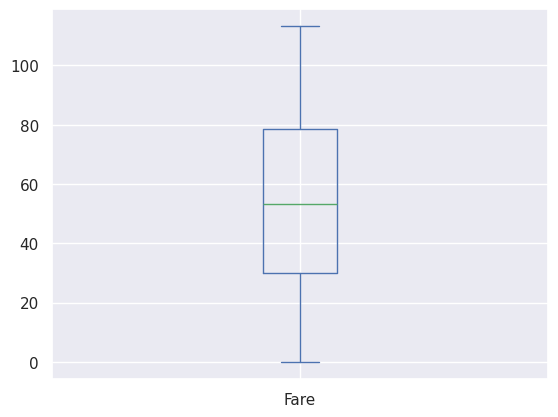

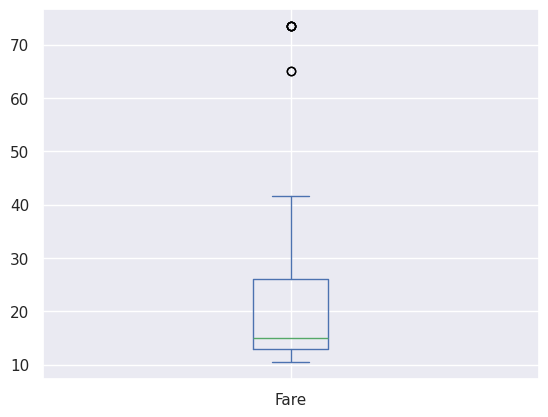

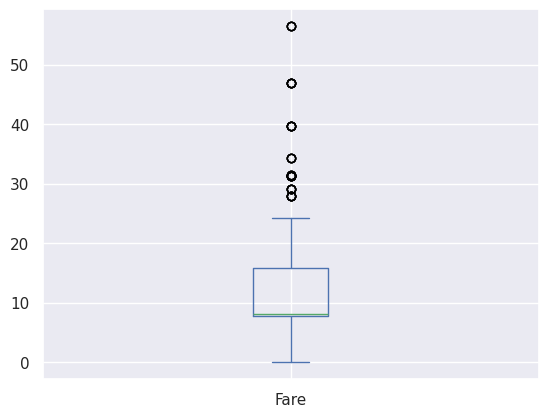

In [39]:
train_df[train_df["Fare"] < train_df["Fare"].quantile(0.95)].groupby(["Pclass"], as_index = False).plot(kind="box",x = "Pclass", y = "Fare", subplots = False, legend = True)

**4. How is the percentage of surviving passengers dependent on passengers' gender? Depict it with `Seaborn.countplot` using the `hue` argument.**

<Axes: xlabel='Survived', ylabel='count'>

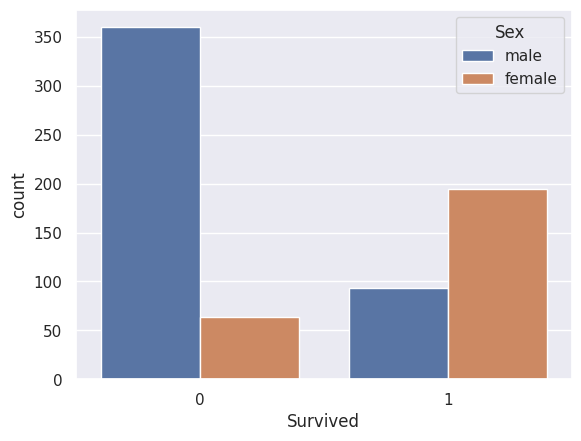

In [43]:
sns.countplot(train_df, x = "Survived", hue='Sex')

**5. How does the distribution of ticket prices differ for those who survived and those who didn't. Depict it with `Seaborn.boxplot`**

<Axes: ylabel='Fare'>

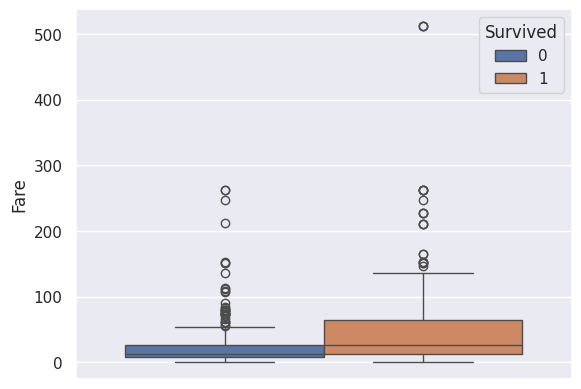

In [44]:
sns.boxplot(train_df, y = "Fare", hue = "Survived")

**6. How does survival depend on passengers' age?  Verify (graphically) an assumption that youngsters (< 30 y.o.) survived more frequently than old people (> 55 y.o.).**

([<matplotlib.patches.Wedge at 0x7bd88f111250>,
 [Text(-0.3193131449799084, 1.0526343693054299, 'Not Survived'),
  Text(0.31931314497990826, -1.0526343693054299, 'Survived')])

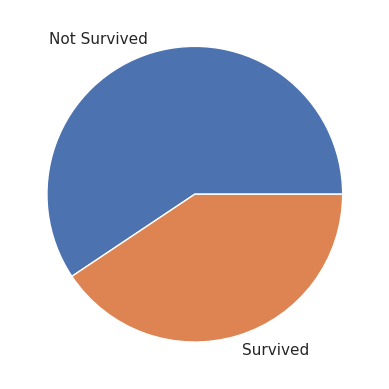

In [65]:
young = train_df[train_df["Age"] < 30]
old = train_df[train_df["Age"] > 55]
plt.pie(young.groupby("Survived")["Survived"].value_counts(), labels = ["Not Survived", "Survived"])

([<matplotlib.patches.Wedge at 0x7bd88f0ff4d0>,
 [Text(-0.695689958156831, 0.8520654212674911, 'Not Survived'),
  Text(0.6956900379329504, -0.8520653561322924, 'Survived')])

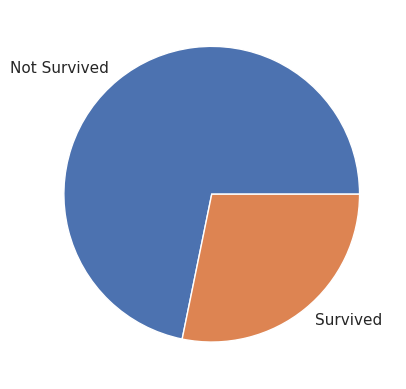

In [68]:
plt.pie(old.groupby("Survived")["Survived"].value_counts(), labels = ["Not Survived", "Survived"])